# Analyse XBeach outputs for smoothed and accurate bathymetry

In [1]:
import os
import glob
import h5py
import netCDF4
import numpy as np
from operator import sub
from scipy import signal
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

import matplotlib

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import xarray as xr

%matplotlib inline

# display plots in SVG format
%config InlineBackend.figure_format = 'svg' 

In [17]:
nc_data = netCDF4.Dataset(r'D:\XBeach_outputs\SB\ex1\ex1_m_SB.nc')
nc_data2 = netCDF4.Dataset(r'D:\XBeach_outputs\SB\ex1\ex1_m_2.5_SB.nc')
nc_data8 = netCDF4.Dataset(r'D:\XBeach_outputs\SB\ex1\ex1_m_8.5_SB.nc')
nc_dataTD = netCDF4.Dataset(r'D:\XBeach_outputs\SB\ex1\ex1_m_TD_SB.nc')

nc_dataB = netCDF4.Dataset(r'D:\XBeach_outputs\SB\ex2\ex2_M_SB.nc')
nc_data2B = netCDF4.Dataset(r'D:\XBeach_outputs\SB\ex2\ex2_m_2.5_SB.nc')
nc_data8B= netCDF4.Dataset(r'D:\XBeach_outputs\SB\ex2\ex2_m_8.5_SB.nc')
nc_dataTDB = netCDF4.Dataset(r'D:\XBeach_outputs\SB\ex2\ex2_m_TD_SB.nc')

## SMOOTHED BATHY
nc_datas = netCDF4.Dataset(r'D:\XBeach_outputs\Smooth Bathy\ex1_smooth_SB.nc')
nc_data2s = netCDF4.Dataset(r'D:\XBeach_outputs\Smooth Bathy\ex2_smooth_SB.nc')


OS_data = [nc_data, nc_data2, nc_data8, nc_dataTD]
OE_data = [nc_dataB, nc_data2B, nc_data8B, nc_dataTDB]
smooth_data = [nc_datas, nc_data2s]


# Print the variables
print(nc_data.variables.keys())

dict_keys(['parameter', 'globalx', 'globaly', 'globaltime', 'zb', 'zs', 'u', 'v', 'H', 'Fx', 'Fy', 'E', 'D', 'wscrit', 'Sxx', 'Sxy', 'Syy', 'c', 'L1', 'cg', 'urms', 'Df', 'pointtime', 'pointx', 'pointy', 'station_id', 'xpointindex', 'ypointindex', 'pointtypes', 'point_zs', 'point_H', 'point_u', 'point_v', 'point_Fx', 'point_Fy', 'point_E', 'point_D', 'point_wscrit', 'meantime', 'u_mean', 'u_var', 'u_min', 'u_max'])


## Plotting Bed Profiles

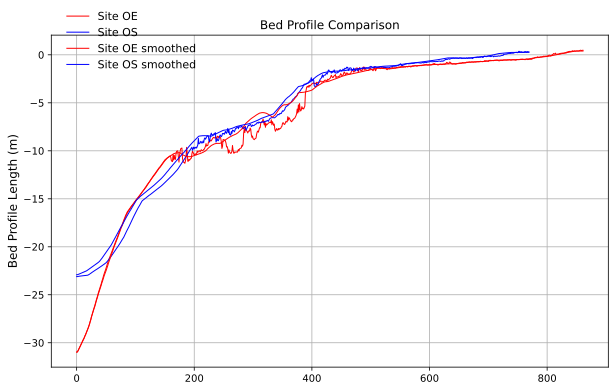

<Figure size 5120x3840 with 0 Axes>

In [18]:
# The y-axis varies between 0 and 80 base on the shape of the arrays:
yp = 80 # Here I chose the middle of the domain 

def plot_bed_profile(data, data2,data3, data4, yp):

    ZB = data.variables['zb'][0,yp,:]
    ypos = data.variables['globaly'][yp,0]
    
    ZB2 = data2.variables['zb'][0,yp,:]
    ypos2 = data2.variables['globaly'][yp,0]
    
    ZBs = data3.variables['zb'][0,yp,:]
    yposs = data3.variables['globaly'][yp,0]
    
    ZBs2 = data4.variables['zb'][0,yp,:]
    yposs2 = data4.variables['globaly'][yp,0]
    
    
    fig, ax1 = plt.subplots(figsize=(10,6))
    ax1.plot(ZB, 'r', label='Site OE', linewidth=1)
    ax1.plot(ZB2, 'b', label='Site OS', linewidth=1)
    ax1.plot(ZBs, 'r', label='Site OE smoothed', linewidth=1)
    ax1.plot(ZBs2, 'b', label='Site OS smoothed', linewidth=1)

    
    ax1.set_ylabel('Bed Depth (m)', size=12)
    ax1.set_ylabel('Bed Profile Length (m)', size=12)
    ax1.tick_params(axis='x', labelsize=10)
    ax1.tick_params(axis='y', labelsize=10)
    
    plt.title('Bed Profile Comparison')
    
    #plt.axvline(x = OSg[0], color = 'b', label = 'SaG start')
    #plt.axvline(x = OSg[1], color = 'b', label = 'SaG end')
    plt.grid()
    ax1.legend(loc = (0.02,0.88), fontsize=11, frameon = False)
    plt.figure(dpi=800)
      
    #fig.savefig('bed_comp2.png')
    plt.show()
    
    
    return 

yp = 80

plot_bed_profile(nc_data,nc_dataB, nc_datas, nc_data2s, yp)
#plot_bed_profile(nc_dataB, yp)
#plot_bed_profile(nc_dataC, yp)

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_bed_profile_3d(data, data2, data3, data4, yp):
    ZB = data.variables['zb'][0, :, :]
    ZB2 = data2.variables['zb'][0, :, :]
    ZBs = data3.variables['zb'][0, :, :]
    ZBs2 = data4.variables['zb'][0, :, :]
    
    X, Y = np.meshgrid(range(ZB.shape[1]), range(ZB.shape[0]))
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Use the 'viridis' colormap for the color scale, adjust as needed
    surf1 = ax.plot_surface(X, Y, ZB, cmap='viridis', label='Site OE')
    #surf2 = ax.plot_surface(X, Y, ZB2, cmap='viridis', label='Site OS')
    #surf3 = ax.plot_surface(X, Y, ZBs, cmap='viridis', label='Site OE Smoothed')
    #surf4 = ax.plot_surface(X, Y, ZBs2, cmap='viridis', label='Site OS Smoothed')
    
    ax.set_xlabel('Bed Profile Length (m)')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Bed Depth (m)')
    ax.set_title('Bed Profile Comparison')
    
    ax.legend(loc=(0.02, 0.88), fontsize=11, frameon=False)
    
    # Rotate the plot to face the other way
    ax.view_init(elev=20, azim=-125)  # Adjust the angles as needed
    
    # Add color bar
    fig.colorbar(surf1, ax=ax, label='Depth (m)')
    
    plt.show()

yp = 80
plot_bed_profile_3d(nc_data, nc_dataB, nc_datas, nc_data2s, yp)


In [5]:
lenOS = len(nc_data.variables['zb'][0,yp,:])

print(f'X length, site OS: {lenOS}')

lenOE = len(nc_dataB.variables['zb'][0,yp,:])


print(f'X length, site OE: {lenOE}')

X length, site OS: 862
X length, site OE: 770


## Plot Dissipation for each CC outcome

85.0


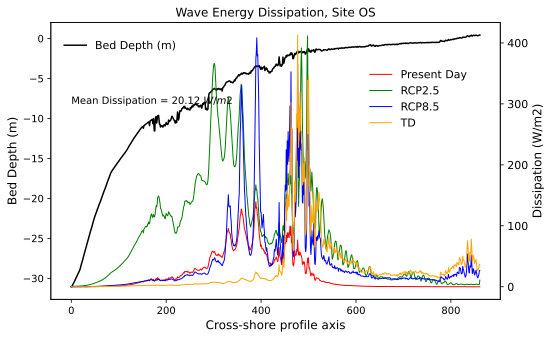

<Figure size 5120x3840 with 0 Axes>

In [6]:
# use y midpoint:

ylength = nc_data.variables['zs'].shape[1]

yp = ylength/2

print (yp)

xlength = nc_data.variables['zs'].shape[2]

zb = nc_data.variables['zb'][0,yp,:]



D = nc_data.variables['D'][:,yp,:]
D2 = nc_data2.variables['D'][:,yp,:]
D3 = nc_data8.variables['D'][:,yp,:]
D4 = nc_dataTD.variables['D'][:,yp,:]

Df = nc_data.variables['Df'][:,yp,:]
Df2 = nc_data2.variables['Df'][:,yp,:]
Df3 = nc_data8.variables['Df'][:,yp,:]
Df4 = nc_dataTD.variables['Df'][:,yp,:]

sumD = np.amax(D,axis=0) + np.amax(Df,axis=0)
sumD2 = np.amax(D2,axis=0) + np.amax(Df2,axis=0)
sumD3 = np.amax(D3,axis=0) + np.amax(Df3,axis=0)
sumD4 = np.amax(D4,axis=0) + np.amax(Df4,axis=0)



    
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)



    
def plot_D_profile(sumD, zb, sumD2, sumD3, sumD4):
    
    fig, ax1 = plt.subplots(figsize=(10,5), sharey = 'all')
    fig.subplots_adjust(right=0.75)##
    ax2 = ax1.twinx()
    
    ax2.plot(sumD, 'red', label='Present Day', linewidth=1)
    ax2.plot(sumD2, 'green', label='RCP2.5', linewidth=1)
    ax2.plot(sumD3, 'blue', label='RCP8.5', linewidth=1)
    ax2.plot(sumD4, 'orange', label='TD', linewidth=1)

    ax2.set_ylabel('Dissipation (W/m2)', size=12)
    ax2.yaxis.label.set_color('black')
    ax2.tick_params(axis='y', labelsize=11)  
    
    ax1.plot(zb, 'black', label='Bed Depth (m)', linewidth=1.5)

    ax1.set_xlabel('Cross-shore profile axis', size=12)
    ax1.set_ylabel('Bed Depth (m)', size=12)
    ax1.tick_params(axis='x', labelsize=10)
    ax1.tick_params(axis='y', labelsize=10)

    ax1.legend(loc = (0.02,0.88), fontsize=11, frameon = False)
    ax2.legend( loc = (0.7, 0.6), fontsize=11, frameon = False)
    #ax3.legend( loc = (0.8, 0.88), fontsize=11, frameon = False)
    
    xt=0
    yt = 300
    
    plt.text(xt,yt,'Mean Dissipation = %s $W/m2$'%(np.around(sumD.mean(), decimals=2, out=None)))
    
    plt.title('Wave Energy Dissipation, Site OS')
    plt.figure(dpi=800)
    plt.show()

plot_D_profile(sumD, zb, sumD2, sumD3, sumD4)

### Now Compare D and Df for each CC outcome

#### Function to plot D, takes mean and peak (max) across time and y domains

In [7]:
D_total = np.zeros(4)
Df_total = np.zeros(4)
def plot_D_profile(data, site = 'OE', scenario = 0, save = False):   
    
    data = data[scenario]
    
    ylength = data.variables['zs'].shape[1]
    
    d = data.variables['D'][:] + data.variables['Df'][:]
    df = data.variables['Df'][:]

    # Average over the time axis (axis 0)
    d_max = np.max(d, axis=0)
    df_max = np.max(df, axis=0)

    d_mean = np.mean(d, axis=0)
    
    # Get the number of y values
    num_y = d_max.shape[0]

    # Create a list of x values
    x = np.arange(d_max.shape[1])
    x2 = np.arange(df_max.shape[1])    
    
    #Plot the bathy, time zero and midpoint is fine:
    yp = data.variables['zb'].shape[1]/2
    zb = data.variables['zb'][0,yp,:]
       
    fig, ax1 = plt.subplots(figsize=(10,5), sharey = 'all')
    fig.subplots_adjust(right=0.75)##
    ax2 = ax1.twinx()
    
        # Plot D for each y value
    for i in range(num_y):
        ax2.plot(x, d_max[i,:], color = 'lightgrey')
        #ax2.plot(x, df_max[i,:], color = 'lightgrey')
    # Calculate the average line
    
    d_max_avg = np.max(d_max, axis=0)
    df_max_avg = np.max(df_max, axis=0)

    # Plot the average line
    plt.plot(x, d_max_avg, 'r', label='Maximum dissipation', linewidth=2)
    plt.plot(x2, df_max_avg, 'b', label='Maximum dissipation by bed friction', linewidth=2)
    
    #ax2.plot(sumD, 'red', label='Dissipation', linewidth=1.5)
    #ax2.plot(np.amax(Df, axis=0), 'green', label='Dissipation due to bed friction', linewidth=1.5)


    ax2.set_ylabel('Dissipation (W/m2)', size=12)
    ax2.yaxis.label.set_color('black')
    ax2.tick_params(axis='y', labelsize=11)  
    
    ax1.plot(zb, 'black', label='Bed Depth (m)', linewidth=1.5)

    ax1.set_xlabel('Cross-shore profile axis', size=12)
    ax1.set_ylabel('Bed Depth (m)', size=12)
    ax1.tick_params(axis='x', labelsize=10)
    ax1.tick_params(axis='y', labelsize=10)

    #Set location of text
    xt=600
    yt = d_max_avg/2

    y_lim_max = 0.14

    #ax2.set_ylim(0,y_lim_max)
    ax2.grid()
    if scenario == 0:
        cc = ''

    if site == 'OS':
        ax2.legend( loc = (0), fontsize=11, frameon = True)

    
    if scenario == 1:
        cc = 'RCP 2.6'
        ax1.legend(loc = (7), fontsize=11, frameon = True)
    if scenario == 2:
        cc = 'RCP 8.5'
    if scenario == 3:
        cc = 'TD'
        ax2.legend( loc = (7), fontsize=11, frameon = True)
    
    D_total[scenario] = np.mean(d_max_avg)
    Df_total[scenario] = np.mean(df_max_avg)
    
    
    print('Peak dissipation: %s' %(np.max(d_max_avg)))
    print('Mean dissipation: %s' %(np.mean(np.mean(d_mean, axis = 0), axis = 0)))
    
    
    plt.title('Dissipation mode, site %s, %s'%(site, cc))
    if save:
        plt.savefig('%s_%s.png'%(site, cc))
    plt.figure(dpi=800)

    plt.show()
    
    return D_total, Df_total


## Functions for plotting

In [4]:

def plot_Db_profile(data, data2, site = 'OS', save = False):
    
    data = data[0]
    yp = 85    
    
    D = data.variables['D'][:,yp,:]
    Df = np.max(data.variables['Df'][:,yp,:],axis=0)
    
    sumD = np.amax(D,axis=0) + np.amax(Df,axis=0)
    
    #Plot the bathy, time zero and midpoint is fine:
    yp = data.variables['zb'].shape[1]/2
    zb = data.variables['zb'][0,yp,:]


    fig, ax1 = plt.subplots(figsize=(10,5))
    fig.subplots_adjust(right=0.75)##
    ax2 = ax1.twinx()
    #ax3 = ax1.twinx()
    
    ax2.plot(sumD, 'blue', label='Dissipation by bed friction', linewidth=1.5)
    ax2.plot(Df, 'blue', label='Dissipation by bed friction', linewidth=1.5)
    #ax2.plot(x2, d_max_avg, 'red', label='Total dissipation', linewidth=1.5)
    #ax2.plot(x2, db_max_avg, 'red', label='Dissipation by wave breaking', linewidth=1.5)
    #ax3.plot(np.max(Df, axis=0), 'blue', label='Dissipation due to friction (m)', linewidth=1.5, linestyle='dashed')


    ax2.set_ylabel('Wave Energy (Nm/m2)', size=12)
    ax2.yaxis.label.set_color('green')
    ax2.tick_params(axis='y', labelsize=11)
    
    #ax3.set_ylabel('Wave Energy Dissipation (W/m2)', size=12)

    #ax3.yaxis.label.set_color('red')
    #ax3.tick_params(axis='y', labelsize=11)
    
    #ax3.spines["right"].set_position(("axes", 1.2))
    #make_patch_spines_invisible(ax3)
    #ax3.spines["right"].set_visible(True)
    
    
    ax1.plot(zb, 'black', label='Bed Depth (m)', linewidth=1.5)

    ax1.set_xlabel('Cross-shore profile axis (m)', size=12)
    ax1.set_ylabel('Bed Depth (m)', size=12)
    ax1.tick_params(axis='x', labelsize=10)
    ax1.tick_params(axis='y', labelsize=10)

    ax1.legend(loc = (0.02,0.88), fontsize=9, frameon = False)
    ax2.legend( loc = (0.6, 0.65), fontsize=9, frameon = False)
    #ax3.legend( loc = (0.6, 0.7), fontsize=11, frameon = False)
    
    
    
    
    ax2.grid()
    plt.title('Wave dissipation, site %s'%site)   
    
    plt.figure(dpi=1000)
    plt.show()

    
#plot_Db_profile(OE_data)

NameError: name 'OE_data' is not defined

In [24]:
D_total = np.zeros(4)
Df_total = np.zeros(4)
def plot_D_profile(data, data2, site = 'OE', scenario = 0, save = False):   
    
    data = data[scenario]
    
    ylength = data.variables['zs'].shape[1]
### FOR NORMAL BATHY:
    d = data.variables['D'][:] + data.variables['Df'][:]
    df = data.variables['Df'][:]

    # Average over the time axis (axis 0)
    d_max = np.max(d, axis=0)
    df_max = np.max(df, axis=0)

    d_mean = np.mean(d, axis=0)
    
    # Get the number of y values
    num_y = d_max.shape[0]

    # Create a list of x values
    x = np.arange(d_max.shape[1])
    x2 = np.arange(df_max.shape[1])
    
    d_max_avg = np.max(d_max, axis=0)
    df_max_avg = np.max(df_max, axis=0)
    
    
### FOR SMOOTH BATHY:
    ds = data2.variables['D'][:] + data2.variables['Df'][:]
    dfs = data2.variables['Df'][:]

    # Average over the time axis (axis 0)
    d_maxs = np.max(ds, axis=0)
    df_maxs = np.max(dfs, axis=0)

    d_means = np.mean(ds, axis=0)
    
    # Get the number of y values
    num_ys = d_maxs.shape[0]

    # Create a list of x values
    x = np.arange(d_max.shape[1])
    x2 = np.arange(df_max.shape[1])    
    
    d_max_avgs = np.max(d_maxs, axis=0)
    df_max_avgs = np.max(df_maxs, axis=0)
    
#Plot the bathy, time zero and midpoint is fine:
    yp = data.variables['zb'].shape[1]/2
    zb = data.variables['zb'][0,yp,:]
    zbs = data2.variables['zb'][0,yp,:]
       
    fig, ax1 = plt.subplots(figsize=(8,4), sharey = 'all')
    fig.subplots_adjust(right=0.75)##
    ax2 = ax1.twinx()
    

    # Plot the average line
    plt.plot(x, d_max_avg, 'r', label='Maximum dissipation', linewidth=0.85)
    #plt.plot(x2, df_max_avg, 'r', label='Maximum dissipation by bed friction', linewidth=0.85)
    
    plt.plot(x, d_max_avgs, 'g', label='Maximum dissipation (smoothed)', linewidth=0.85, ls = '--')
    #plt.plot(x2, df_max_avgs, 'k', label='Maximum dissipation by bed friction (smoothed)', linewidth=0.85, ls = '--')
    
    #ax2.plot(sumD, 'red', label='Dissipation', linewidth=1.5)
    #ax2.plot(np.amax(Df, axis=0), 'green', label='Dissipation due to bed friction', linewidth=1.5)


    ax2.set_ylabel('Dissipation (W/m2)', size=12)
    ax2.yaxis.label.set_color('black')
    ax2.tick_params(axis='y', labelsize=11)  
## PLOT BED PROFILES
    ax1.plot(zb, 'k', label='Realistic', linewidth=0.5)
    ax1.plot(zbs, 'k', label='Smoothed', linewidth=0.5, ls = '--')

    ax1.set_xlabel('Cross-shore profile axis', size=12)
    ax1.set_ylabel('Bed Depth (m)', size=12)
    ax1.tick_params(axis='x', labelsize=10)
    ax1.tick_params(axis='y', labelsize=10)
    
    ax1.set_ylim(zb.min(), 5)

    ax2.grid()


    if site == 'OS':
        ax2.set_ylim(0,1000)
        ax2.legend(fontsize=9, frameon = True)
    if site == 'OE':
        ax2.set_ylim(0,500)
        ax1.legend(loc = ('upper left'), fontsize=9, frameon = True, title = 'Bathymetry') 

    #ax2.legend( loc = ('upper right'), fontsize=9, frameon = True)
    #ax1.legend(loc = (0.02,0.88), fontsize=9, frameon = True)  
    
    D_total[scenario] = np.mean(d_max_avg)
    Df_total[scenario] = np.mean(df_max_avg)
    
    
    print('Peak dissipation: %s' %(np.max(d_max_avg)))
    print('Mean dissipation: %s' %(np.mean(np.mean(d_mean, axis = 0), axis = 0)))
    
        
    print('Peak dissipation smoothed: %s' %(np.max(d_max_avgs)))
    print('Mean dissipation smoothed: %s' %(np.mean(np.mean(d_means, axis = 0), axis = 0)))
    
    
    plt.title('Maximum dissipation at %s'%(site))
    if save:
        plt.savefig(r'C:\Users\lachl\OneDrive - The University of Sydney (Staff)\Writing\SAGS figs\%s_smooth_final.png'%(site))
    plt.figure(dpi=1200)

    plt.show()
    
    return D_total, Df_total


Peak dissipation: 463.8538790428531
Mean dissipation: 2.5200937116585433
Peak dissipation smoothed: 386.6857269147697
Mean dissipation smoothed: 2.2008920024993928


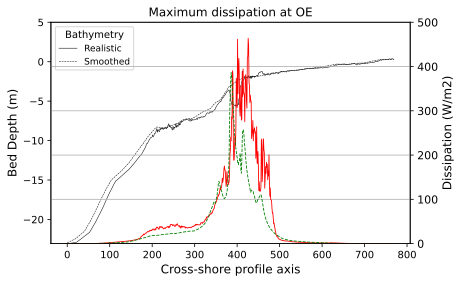

<Figure size 7680x5760 with 0 Axes>

Peak dissipation: 946.2506746710039
Mean dissipation: 4.359929102287235
Peak dissipation smoothed: 92.550969953459
Mean dissipation smoothed: 2.61318861326444


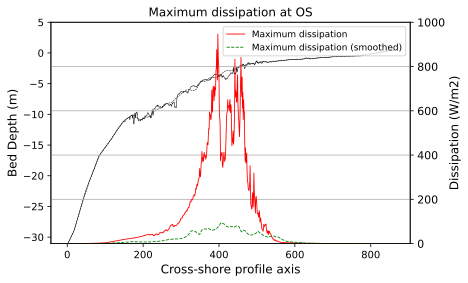

<Figure size 7680x5760 with 0 Axes>

(array([110.41169169,   0.        ,   0.        ,   0.        ]),
 array([74.70440417,  0.        ,  0.        ,  0.        ]))

In [25]:
plot_D_profile(OE_data, nc_data2s, site = 'OE', scenario = 0, save = True)
plot_D_profile(OS_data, nc_datas, site = 'OS', scenario = 0, save = True)
#plot_D_profile(OE_data, site = 'OE', scenario = 1, save = True)
#plot_D_profile(OE_data, site = 'OE', scenario = 2, save = True)
#plot_D_profile(OE_data, site = 'OE', scenario = 3, save = True)
#OE_summary = pd.DataFrame()
#OE_summary['Scenairo'] = ['PD','RCP2.6', 'RCP8.5', 'TD']
#OE_summary['D_total'] = D_total
#OE_summary['Df_total'] = Df_total

### Repeat again but this time showing Db and Df

In [26]:
D_total = np.zeros(4)
Df_total = np.zeros(4)
def plot_DbDf_profile(data, data2, site = 'OE', scenario = 0, save = False):   
    
    data = data[scenario]
    
    ylength = data.variables['zs'].shape[1]
### FOR NORMAL BATHY:
    #d = data.variables['D'][:] + data.variables['Df'][:]
    #df = data.variables['Df'][:]

    # Average over the time axis (axis 0)
    #d_max = np.max(d, axis=0)
    #df_max = np.max(df, axis=0)

    #d_mean = np.mean(d, axis=0)
    
    # Get the number of y values
    #num_y = d_max.shape[0]

    # Create a list of x values
    #x = np.arange(d_max.shape[1])
    #x2 = np.arange(df_max.shape[1])
    
    #d_max_avg = np.max(d_max, axis=0)
    #df_max_avg = np.max(df_max, axis=0)
    
    
### FOR SMOOTH BATHY:
    ds = data2.variables['D'][:] + data2.variables['Df'][:]
    dfs = data2.variables['Df'][:]

    # Average over the time axis (axis 0)
    d_maxs = np.max(ds, axis=0)
    df_maxs = np.max(dfs, axis=0)

    d_means = np.mean(ds, axis=0)
    df_means = np.mean(dfs, axis = 0)
    
    # Get the number of y values
    num_ys = d_maxs.shape[0]

    # Create a list of x values
    x = np.arange(d_maxs.shape[1])
    x2 = np.arange(df_maxs.shape[1])    
    
    d_max_avgs = np.max(d_maxs, axis=0)
    df_max_avgs = np.max(df_maxs, axis=0)
    
#Plot the bathy, time zero and midpoint is fine:
    yp = data.variables['zb'].shape[1]/2
    zb = data.variables['zb'][0,yp,:]
    zbs = data2.variables['zb'][0,yp,:]
       
    fig, ax1 = plt.subplots(figsize=(8,4), sharey = 'all')
    fig.subplots_adjust(right=0.75)##
    ax2 = ax1.twinx()
    
    for i in range(num_ys):
        ax2.plot(x, d_maxs[i,:], color = 'lightgrey')
    

    # Plot the average line
    #plt.plot(x, d_max_avg, 'r', label='Maximum dissipation', linewidth=0.85)
    #plt.plot(x2, df_max_avg, 'r', label='Maximum dissipation by bed friction', linewidth=0.85)
    
    plt.plot(x, d_max_avgs, 'r', label='Maximum dissipation', linewidth=0.85)
    plt.plot(x2, df_max_avgs, 'b', label='Maximum dissipation by bed friction', linewidth=0.85)
    
    #ax2.plot(sumD, 'red', label='Dissipation', linewidth=1.5)
    #ax2.plot(np.amax(Df, axis=0), 'green', label='Dissipation due to bed friction', linewidth=1.5)


    ax2.set_ylabel('Dissipation (W/m2)', size=12)
    ax2.yaxis.label.set_color('black')
    ax2.tick_params(axis='y', labelsize=11)  
## PLOT BED PROFILES
    #ax1.plot(zb, 'k', label='Realistic', linewidth=0.5)
    ax1.plot(zbs, 'k', label='Smoothed', linewidth=0.5)

    ax1.set_xlabel('Cross-shore profile axis', size=12)
    ax1.set_ylabel('Bed Depth (m)', size=12)
    ax1.tick_params(axis='x', labelsize=10)
    ax1.tick_params(axis='y', labelsize=10)
    
    ax1.set_ylim(zb.min(), 5)

    ax2.grid()


    if site == 'OS':
        ax2.set_ylim(0,500)
        ax2.legend(fontsize=9, frameon = True)
    if site == 'OE':
        ax2.set_ylim(0,500)
        #ax1.legend(loc = ('upper left'), fontsize=9, frameon = True, title = 'Bathymetry') 

    #ax2.legend( loc = ('upper right'), fontsize=9, frameon = True)
    #ax1.legend(loc = (0.02,0.88), fontsize=9, frameon = True)  
    
    #D_total[scenario] = np.mean(d_max_avg)
    #Df_total[scenario] = np.mean(df_max_avg)
    
    
    #print('Peak dissipation: %s' %(np.max(d_max_avg)))
    #print('Mean dissipation: %s' %(np.mean(np.mean(d_mean, axis = 0), axis = 0)))
    
        
    print('Peak dissipation smoothed all: %s' %(np.max(d_max_avgs)))
    print('Peak dissipation smoothed friction: %s' %(np.max(df_max_avgs)))

    print('Mean dissipation smoothed: %s' %(np.mean(np.mean(d_means, axis = 0), axis = 0)))
    print('Mean dissipation smoothed friction: %s' %(np.mean(np.mean(df_means, axis = 0), axis = 0)))
    
    
    plt.title('Dissipation mode, site %s'%(site))
    if save:
        plt.savefig(r'C:\Users\lachl\OneDrive - The University of Sydney (Staff)\Writing\SAGS figs\%s_smooth_DF_final.png'%(site))
    plt.figure(dpi=1200)

    plt.show()
    
    return D_total, Df_total



Peak dissipation smoothed all: 92.550969953459
Peak dissipation smoothed friction: 91.06447808529025
Mean dissipation smoothed: 2.61318861326444
Mean dissipation smoothed friction: 2.6119271963618935


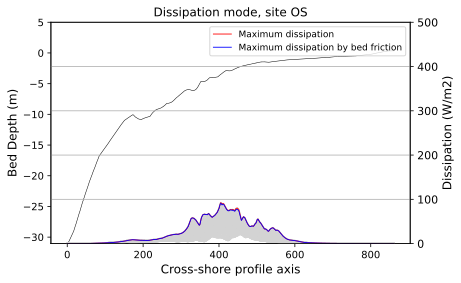

<Figure size 7680x5760 with 0 Axes>

Peak dissipation smoothed all: 386.6857269147697
Peak dissipation smoothed friction: 237.25685509433535
Mean dissipation smoothed: 2.2008920024993928
Mean dissipation smoothed friction: 2.1878858453426684


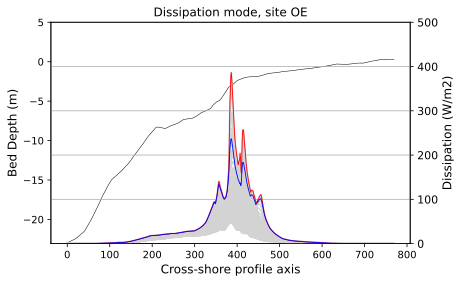

<Figure size 7680x5760 with 0 Axes>

(array([0., 0., 0., 0.]), array([0., 0., 0., 0.]))

In [27]:
plot_DbDf_profile(OS_data, nc_datas, site = 'OS', scenario = 0, save = False)
plot_DbDf_profile(OE_data, nc_data2s, site = 'OE', scenario = 0, save = False)